In [130]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [132]:
url ='../Data/train.parquet'
data = pd.read_parquet(url)

# Exploracion Inicial

In [133]:
df = data.copy()

In [134]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.0
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.0
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.58kg,836.6
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,1119.0


In [135]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
907,837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35kg,355.00
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,379.00
909,225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 520,Linux,2.2kg,677.35
910,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,745.00
911,87,Dell,Inspiron 7577,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.65kg,1349.00


In [136]:
df.shape

(912, 13)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    object 
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 92.8+ KB


In [138]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

## Se puede apreciar que no hay valores nulos

In [139]:
duplicados = df.duplicated().sum()
print("Número de filas duplicadas:", duplicados)

Número de filas duplicadas: 0


## Tampoco hay filas duplicadas

In [140]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [141]:
df['Company'].unique()

array(['Dell', 'Asus', 'HP', 'Toshiba', 'Lenovo', 'Google', 'LG', 'MSI',
       'Acer', 'Mediacom', 'Apple', 'Microsoft', 'Fujitsu', 'Huawei',
       'Xiaomi', 'Vero', 'Chuwi', 'Samsung', 'Razer'], dtype=object)

In [142]:
df['Product'].unique()

array(['Inspiron 3179', 'FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon',
       'ZBook 15', 'Pavilion X360', 'Tecra A50-C-1ZV', 'Vostro 5468',
       '250 G6', 'Latitude 3580', 'IdeaPad 310-15IKB',
       'IdeaPad Y700-15ACZ', 'EliteBook 840', 'Inspiron 5567',
       'Pixelbook (Core', 'VivoBook E201NA', 'Latitude E5570',
       'ProBook 650', 'IdeaPad Y700-15ISK', 'Yoga 500-14ISK',
       'Inspiron 5579', 'Vostro 3559', 'Gram 15Z970', 'Yoga 11e',
       'XPS 13', 'Latitude 5480', 'ProBook 450', 'GP62M Leopard',
       'Inspiron 3567', 'Inspiron 5770', 'ThinkPad Yoga', 'Thinkpad P51',
       'Latitude 7280', 'Legion Y720-15IKB', 'Precision M5520',
       'Aspire 3', 'Omen 17-an012dx', 'VivoBook Max', 'E5 774G',
       'Zbook 15', 'Inspiron 3552', 'B51-80 (i5-6200U/8GB/1TB/Radeon',
       'SmartBook Edge', 'IdeaPad 320-17ISK', 'Inspiron 5370',
       'Gram 15Z975', 'Gram 14Z970',
       'B51-80 (i7-6500U/4GB/1008GB/FHD/W7)',
       'FX503VD-E4022T (i7-7700HQ/8GB/1TB/GeForce', 'Probook 640',
 

In [143]:
df['ScreenResolution'].unique()

array(['Touchscreen 1366x768', 'Full HD 1920x1080',
       'IPS Panel Touchscreen 1366x768', '1366x768',
       'IPS Panel Full HD 1920x1080', 'Touchscreen 2400x1600',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080', 'IPS Panel 1366x768',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Retina Display 2880x1800', 'Quad HD+ 3200x1800',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2560x1440',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'Quad HD+ / Touchscreen 3200x1800',
       'IPS Panel Retina Display 2560x1600', 'Touchscreen 2256x1504',
       'IPS Panel 2560x1440', 'IPS Panel Touchscreen 2560x1440',
       'IPS Panel Touchscreen 1920x1200', 'IPS Panel Full HD 2160x1440',
       'IPS Panel 4K Ultra HD 3840x2160', '1920x1080',
       'Touchscreen / Full HD 1920x1080', '2560x1440',
       'IPS Panel Retina Display 2304x1440',
       '

In [144]:
df['OpSys'].unique()

array(['Windows 10', 'Chrome OS', 'Windows 10 S', 'Windows 7', 'Linux',
       'No OS', 'Mac OS X', 'macOS', 'Android'], dtype=object)

# Analisis Exploratorio

In [145]:
df.describe()

,laptop_ID,Price_euros
count,912.000000,912.000000
mean,663.118421,1111.262533
std,380.713558,682.109694
min,1.000000,174.000000
25%,339.750000,598.742500
50%,666.500000,977.000000
75%,985.250000,1472.650000
max,1320.000000,5499.000000


In [146]:
df.describe(include='all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,912.000000,912,912,912,912,912,912,912,912,912,912,912,912.000000
unique,NaN,19,484,6,18,38,104,9,34,94,9,160,NaN
top,NaN,Dell,XPS 13,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,214,21,498,461,357,137,436,282,198,760,84,NaN
mean,663.118421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111.262533
std,380.713558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,682.109694
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,339.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598.742500
50%,666.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,985.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1472.650000


## Variable categorica
- Company.
- Product.
- TypeName.
- ScreenResolution.
- CPU_Company.
- CPU_Type.
- Memory.
- GPU_Company.
- GPU_Type.
- OpSys.
---
## Variable numerica
- Inches.
- CPU_Frequency (GHz).
- RAM (GB).
- Weight (kg).
- Price (Euro).
---

### Variable Categorica

In [170]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price_euros,Width,Height,Touchscreen,CPU_Company,CPU_Type,GPU_Company,GPU_Type,CPU_Speed
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,4.0,128GB SSD,Windows 10,1.39,603.00,1366.0,768.0,1,Intel,M 7,Intel,NaN,NaN
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,8.0,1TB HDD,Windows 10,2.45,699.00,1920.0,1080.0,0,AMD,FX 9830,AMD,RX 560,NaN
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,16.0,256GB SSD,Windows 10,2.60,2419.00,1920.0,1080.0,0,Intel,i7,Nvidia,NaN,NaN
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,8.0,256GB SSD,Windows 10,1.58,836.60,1366.0,768.0,1,Intel,i5,Intel,NaN,NaN
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,8.0,256GB SSD,Windows 10,2.20,1119.00,1366.0,768.0,0,Intel,i5,Intel,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,4.0,32GB Flash Storage,Chrome OS,1.35,355.00,1366.0,768.0,0,Intel,N3060,Intel,NaN,NaN
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,4.0,32GB Flash Storage,Chrome OS,1.25,379.00,1366.0,768.0,1,Intel,N3160,Intel,NaN,NaN
909,225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,8.0,256GB SSD,Linux,2.20,677.35,1920.0,1080.0,0,Intel,i5,AMD,NaN,NaN
910,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,8.0,256GB SSD,Windows 10,2.20,745.00,1920.0,1080.0,0,Intel,i7,AMD,NaN,NaN


In [148]:
df['Memory'].unique()

array(['128GB SSD', '1TB HDD', '256GB SSD', '500GB HDD',
       '512GB SSD +  1TB HDD', '512GB SSD', '2TB HDD',
       '64GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  1TB HDD', '32GB SSD', '1.0TB Hybrid',
       '256GB Flash Storage', '32GB Flash Storage', '1TB SSD',
       '256GB SSD +  500GB HDD', '16GB SSD', '512GB SSD +  256GB SSD',
       '256GB SSD +  2TB HDD', '64GB Flash Storage +  1TB HDD', '8GB SSD',
       '180GB SSD', '508GB Hybrid', '256GB SSD +  256GB SSD',
       '16GB Flash Storage', '128GB SSD +  2TB HDD',
       '128GB Flash Storage', '512GB Flash Storage', '1TB SSD +  1TB HDD',
       '512GB SSD +  2TB HDD', '240GB SSD', '1.0TB HDD', '32GB HDD',
       '64GB SSD'], dtype=object)

## Separar columnnas
- ScreenResolution

In [149]:
df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(float)
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen', case=False).astype(int)


- Se extrae informacion como ressolucion de pantallas y mas que todo el tamaño

In [150]:
df['CPU_Company'] = df['Cpu'].str.split().str[0]  
df['CPU_Type'] = df['Cpu'].str.extract(r'(i[3579]|[A-Za-z]+\s?\d+)')  

- Sperarar fabricante y modelo

In [151]:
df['GPU_Company'] = df['Gpu'].str.split().str[0]  
df['GPU_Type'] = df['Gpu'].str.extract(r'(RTX|GTX|RX\s?\d+|HD\s?\d+)')  

- Lo mismo para Gpu

In [152]:
df['CPU_Speed'] = df['CPU_Type'].str.extract(r'(\d+\.?\d*)GHz').astype(float, errors='ignore')

- Extraer la velocidad

### Conversion de unidades

In [178]:
# df['Ram'] = df['Ram'].str.replace('GB', '').astype(float)
# df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

### Separar la columna 'Memory' en tamaño y tipo de almacenamiento

In [179]:
df[['Memory_Size', 'Memory_Type']] = df['Memory'].str.extract(r'(\d+GB|\d+TB)\s*(.*)')

### Separar la columna 'OpSys' para extraer el sistema operativo principal y version

In [180]:
df['OpSys_Main'] = df['OpSys'].str.extract(r'(\w+)\s?')

In [182]:
df['OpSys_Versions'] = df['OpSys']

## Una vez extraido confirmamos para eliminar columnas

In [186]:
df = df.drop(columns=['Cpu', 'Unnamed: 0', 'Gpu', 'OpSys', 'Memory','ScreenResolution'], errors='ignore')

In [187]:
df

,laptop_ID,Company,Product,TypeName,Inches,Ram,Weight,Price_euros,Width,Height,Touchscreen,CPU_Company,CPU_Type,GPU_Company,GPU_Type,CPU_Speed,Memory_Size,Memory_Type,OpSys_Main,OpSys_Versions
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,4.0,1.39,603.00,1366.0,768.0,1,Intel,M 7,Intel,NaN,NaN,128GB,SSD,Windows,Windows 10
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,8.0,2.45,699.00,1920.0,1080.0,0,AMD,FX 9830,AMD,RX 560,NaN,1TB,HDD,Windows,Windows 10
2,744,HP,ZBook 15,Workstation,15.6,16.0,2.60,2419.00,1920.0,1080.0,0,Intel,i7,Nvidia,NaN,NaN,256GB,SSD,Windows,Windows 10
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,8.0,1.58,836.60,1366.0,768.0,1,Intel,i5,Intel,NaN,NaN,256GB,SSD,Windows,Windows 10
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,8.0,2.20,1119.00,1366.0,768.0,0,Intel,i5,Intel,NaN,NaN,256GB,SSD,Windows,Windows 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,837,Acer,Chromebook 11,Netbook,11.6,4.0,1.35,355.00,1366.0,768.0,0,Intel,N3060,Intel,NaN,NaN,32GB,Flash Storage,Chrome,Chrome OS
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,4.0,1.25,379.00,1366.0,768.0,1,Intel,N3160,Intel,NaN,NaN,32GB,Flash Storage,Chrome,Chrome OS
909,225,Dell,Inspiron 3576,Notebook,15.6,8.0,2.20,677.35,1920.0,1080.0,0,Intel,i5,AMD,NaN,NaN,256GB,SSD,Linux,Linux
910,17,Dell,Inspiron 3567,Notebook,15.6,8.0,2.20,745.00,1920.0,1080.0,0,Intel,i7,AMD,NaN,NaN,256GB,SSD,Windows,Windows 10


## Agregamos media pra el precio

In [160]:
df['Price_euros'] = df['Price_euros'].fillna(df['Price_euros'].median())

# Columnas del Dataset

| **#** | **Columna**       | **Descripción**                                                                 |
|-------|--------------------|-------------------------------------------------------------------------------|
| 1     | **Unnamed: 0**     | Índice no nombrado, generado automáticamente.                                 |
| 2     | **laptop_ID**      | Identificador único de la laptop.                                            |
| 3     | **Company**        | Marca o fabricante de la laptop.                                             |
| 4     | **Product**        | Nombre o modelo del producto.                                                |
| 5     | **TypeName**       | Tipo de laptop (Gaming, Convertible, Notebook, etc.).                        |
| 6     | **Inches**         | Tamaño de la pantalla en pulgadas.                                           |
| 7     | **ScreenResolution** | Resolución de la pantalla (por ejemplo: Full HD 1920x1080).                |
| 8     | **Ram**            | Cantidad de memoria RAM en GB.                                               |
| 9     | **Memory**         | Información original del almacenamiento (tamaño y tipo).                     |
| 10    | **OpSys**          | Sistema operativo completo (ejemplo: Windows 10, Mac OS X).                  |
| 11    | **Weight**         | Peso de la laptop en kilogramos.                                             |
| 12    | **Price_euros**    | Precio de la laptop en euros.                                                |
| 13    | **Width**          | Resolución horizontal de la pantalla (en píxeles).                          |
| 14    | **Height**         | Resolución vertical de la pantalla (en píxeles).                            |
| 15    | **Touchscreen**    | Indica si la pantalla es táctil: 1 (Sí) o 0 (No).                            |
| 16    | **CPU_Company**    | Fabricante del procesador (ejemplo: Intel, AMD).                             |
| 17    | **CPU_Type**       | Modelo o tipo del procesador (ejemplo: i7, Ryzen 5).                         |
| 18    | **GPU_Company**    | Fabricante de la GPU (ejemplo: Intel, Nvidia, AMD).                          |
| 19    | **GPU_Type**       | Modelo o tipo de la GPU.                                                     |
| 20    | **CPU_Speed**      | Velocidad del procesador en GHz (si está disponible).                        |
| 21    | **Memory_Size**    | Tamaño del almacenamiento (ejemplo: 128GB, 1TB).                             |
| 22    | **Memory_Type**    | Tipo de almacenamiento (ejemplo: SSD, HDD).                                  |
| 23    | **OpSys_Main**     | Sistema operativo principal (ejemplo: Windows, MacOS, Linux).                |
| 24    | **OpSys_Versions** | Versión completa del sistema operativo (ejemplo: Windows 10, Ubuntu 18.04). |



In [161]:
df.to_parquet('train_limpio.parquet')

In [173]:
df = pd.read_parquet('train_limpio.parquet')


In [174]:
df.to_csv('train_limpio.csv')
df = pd.read_csv('train_limpio.csv')

# Confirmar que no hay valores faltantes.

In [162]:
missing_values_df = df.isnull().sum()
missing_summary = pd.DataFrame({
    'Column': missing_values_df.index,
    'Missing Values': missing_values_df.values,
    'Missing %': (missing_values_df / len(df)) * 100
}).sort_values(by='Missing Values', ascending=False)

# Analisis descriptivo

In [163]:
numeric_descriptive_stats = df.describe()
categorical_columns = df.select_dtypes(include='object').columns
categorical_descriptive_stats = df[categorical_columns].describe()

In [164]:
numeric_descriptive_stats

,laptop_ID,Ram,Weight,Price_euros,Width,Height,Touchscreen,CPU_Speed
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,0.0
mean,663.118421,8.377193,2.045422,1111.262533,1877.131579,1060.982456,0.152412,NaN
std,380.713558,5.144482,0.673665,682.109694,470.439177,271.138397,0.359617,NaN
min,1.000000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.000000,NaN
25%,339.750000,4.000000,1.500000,598.742500,1600.000000,900.000000,0.000000,NaN
50%,666.500000,8.000000,2.050000,977.000000,1920.000000,1080.000000,0.000000,NaN
75%,985.250000,8.000000,2.330000,1472.650000,1920.000000,1080.000000,0.000000,NaN
max,1320.000000,64.000000,4.700000,5499.000000,3840.000000,2160.000000,1.000000,NaN


In [165]:
categorical_descriptive_stats

,Company,Product,TypeName,Inches,ScreenResolution,Memory,OpSys,CPU_Company,CPU_Type,GPU_Company,GPU_Type
count,912,912,912,912,912,912,912,912,912,912,182
unique,19,484,6,18,38,34,9,3,39,4,5
top,Dell,XPS 13,Notebook,15.6,Full HD 1920x1080,256GB SSD,Windows 10,Intel,i7,Intel,GTX
freq,214,21,498,461,357,282,760,866,362,504,172


In [166]:
# Revisar los valores únicos de la columna original 'Cpu' para identificar problemas en el formato
cpu_unique_values = df['CPU_Type'].unique()

# Mostrar algunos valores únicos para inspección
cpu_unique_values[:10]


array(['M 7', 'FX 9830', 'i7', 'i5', 'i3', 'FX 8800', 'N3350', 'N3450',
       'A9', 'N3700'], dtype=object)

# Visualizaciones


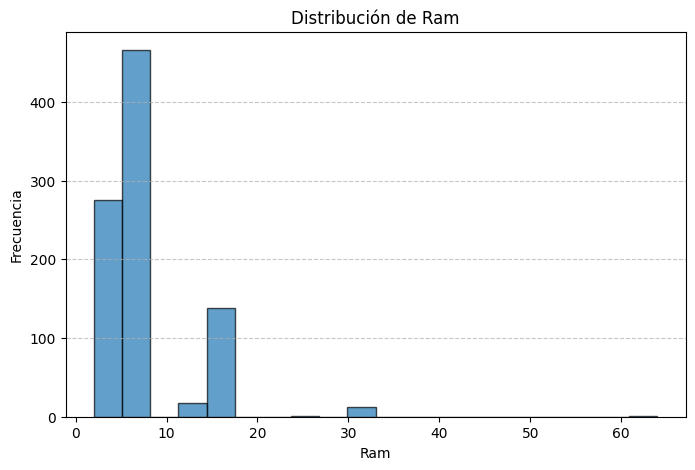

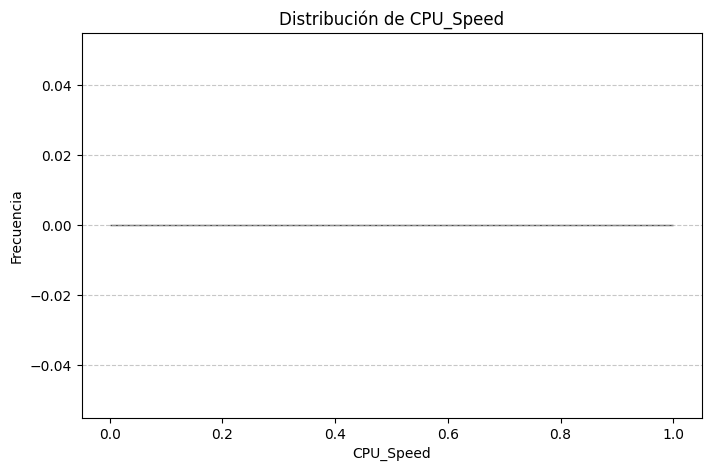

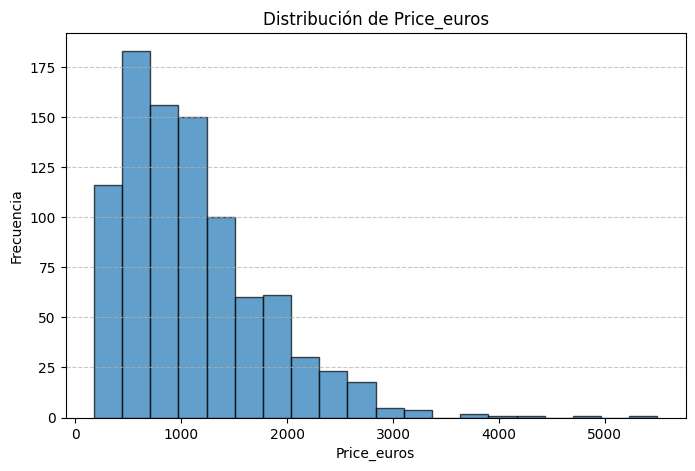

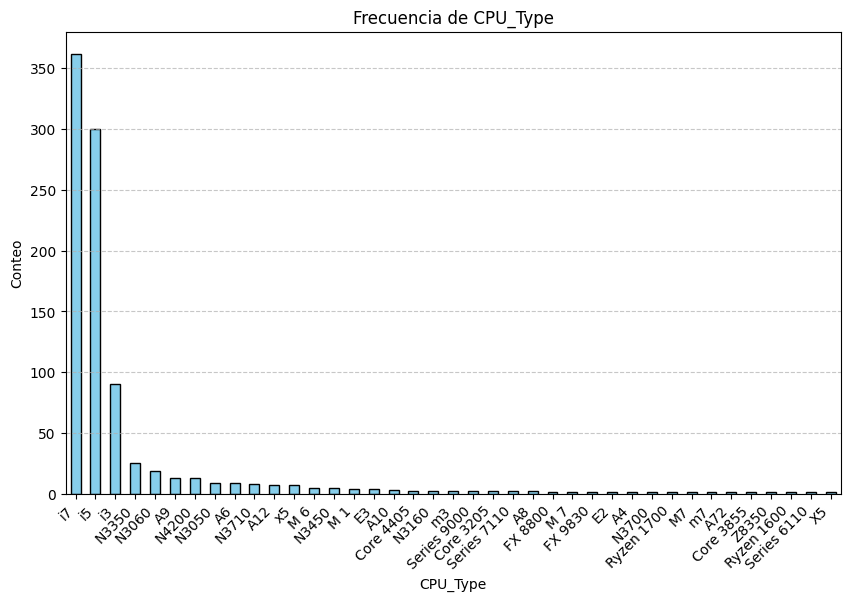

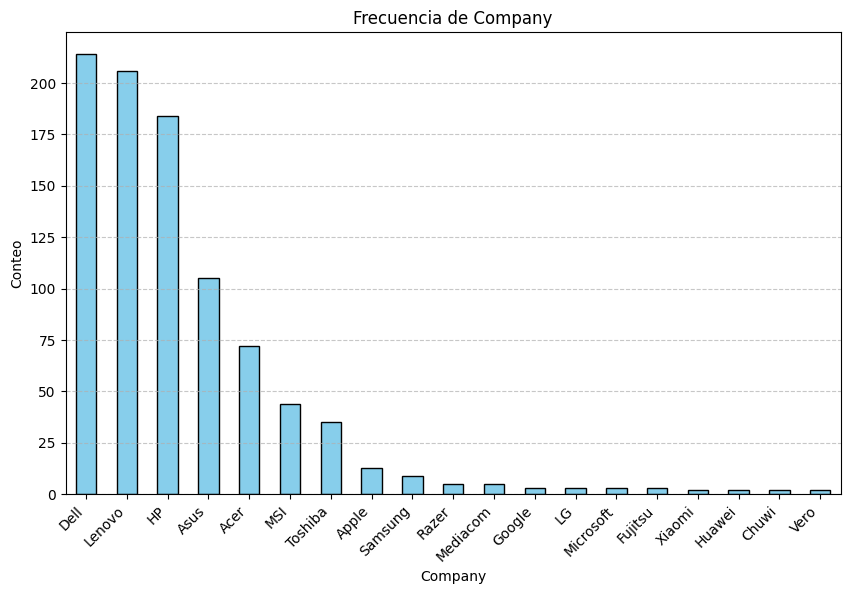

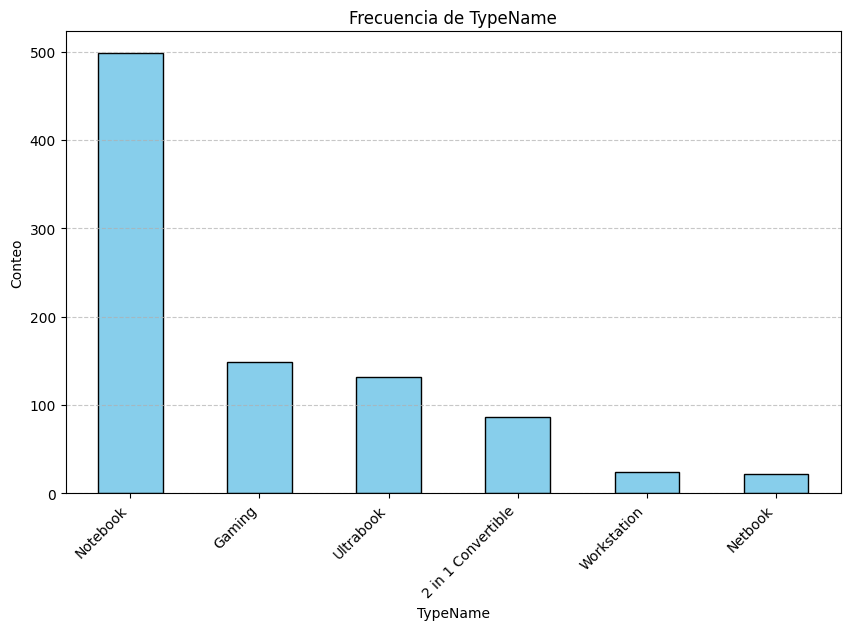

In [167]:
numerica_vars = ['Ram','CPU_Speed', 'Price_euros']
for var in numerica_vars:
    plt.figure(figsize=(8, 5))
    plt.hist(df[var].dropna(), bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

categorical_vars = ['CPU_Type', 'Company', 'TypeName']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    df[var].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Frecuencia de {var}')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()